## About this dataset

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
dataset=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
pd.set_option('display.max_columns',500)

In [4]:
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Data Analysis

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### from the info of dataset we can see there is no any missing values so we need not to adjust the values of variables

In [6]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### features_details


Anemia = Decrease of red blood cells or hemoglobin (boolean)

creatinine_phosphokinase = Level of the CPK enzyme in the blood (mcg/L)

diabetes = the patient has diabetes (boolean)

ejection_fraction = Percentage of blood leaving the heart at each contraction (percentage)

high_blood_pressure = If the patient has hypertension (boolean)

platelets = Platelets in the blood (kiloplatelets/mL)

erum_creatinine = Level of serum creatinine in the blood (mg/dL)

serum_sodium = Level of serum sodium in the blood (mEq/L)

sex = Woman or man (binary)


### Now I am trying to get relationship from each feature to the Death event

In [5]:
reg_dataset=dataset.drop(columns='DEATH_EVENT')

In [8]:
reg_dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [7]:
Death_event=dataset['DEATH_EVENT']

In [8]:
Catego_feature=[feature for feature in reg_dataset.columns if len(set(reg_dataset[feature]))<3]

In [9]:
Catego_feature

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

In [10]:
Numerical_feature=[feature for feature in reg_dataset.columns if feature not in Catego_feature]

In [11]:
Numerical_feature

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

In [21]:
Death_event.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

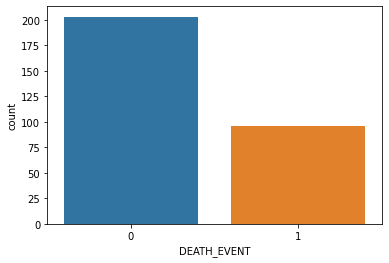

In [6]:
sns.countplot(x=Death_event);

Since the dataset is not much balanced also here precision is most important to check model efficiency so we will use Precision to check model efficiency, if we use accuracy score then it may be biased in this case.

### Trying to find insights between Numerical Features and Death event

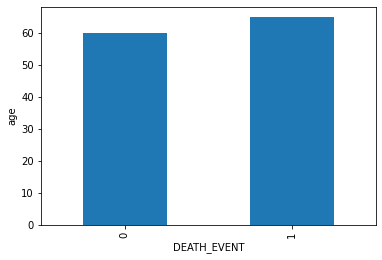

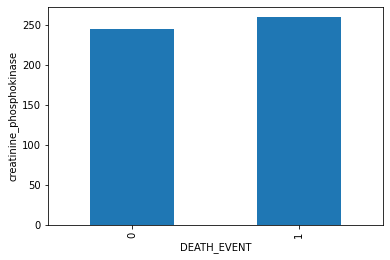

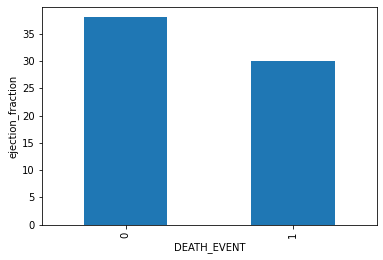

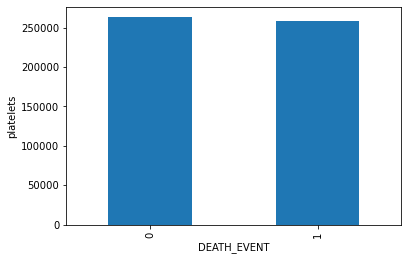

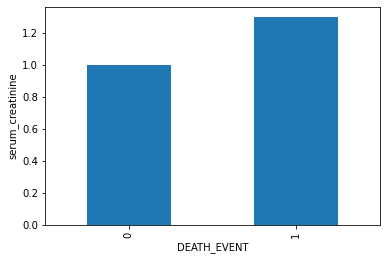

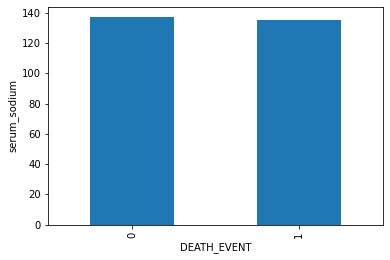

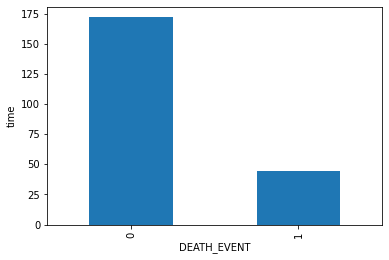

In [15]:
for feature in Numerical_feature:
    data=dataset.copy()
    data.groupby('DEATH_EVENT')[feature].median().plot.bar()
    plt.xlabel('DEATH_EVENT')
    plt.ylabel(feature)
    plt.show()
    

### Count of Death event in each categorical fetures

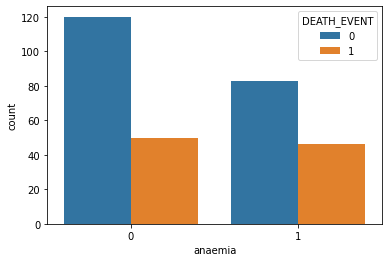

In [16]:
sns.countplot(x=dataset.anaemia,y=None,hue=dataset.DEATH_EVENT,data=reg_dataset)

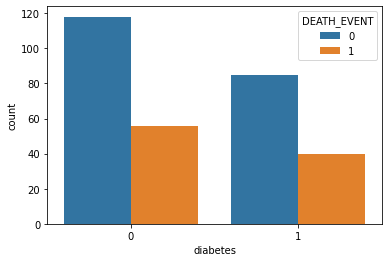

In [17]:
sns.countplot(x=dataset.diabetes,y=None,hue=dataset.DEATH_EVENT,data=reg_dataset) 


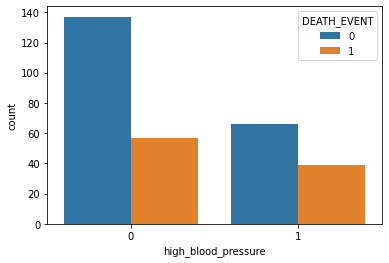

In [18]:
sns.countplot(x=dataset.high_blood_pressure,y=None,hue=dataset.DEATH_EVENT,data=reg_dataset)


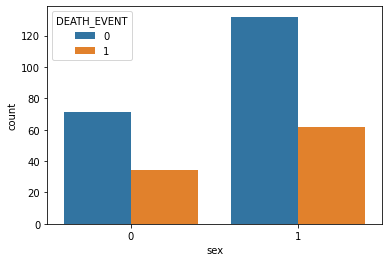

In [19]:
sns.countplot(x=dataset.sex,y=None,hue=dataset.DEATH_EVENT,data=reg_dataset)


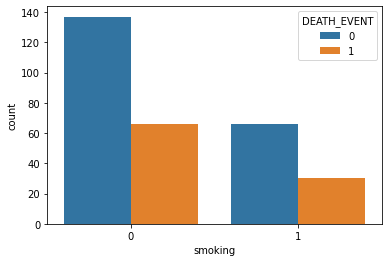

In [20]:
sns.countplot(x=dataset.smoking,y=None,hue=dataset.DEATH_EVENT,data=reg_dataset)

### Analayse the distribution of Continuous variable

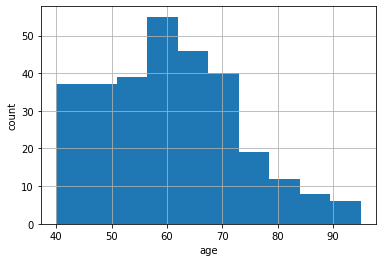

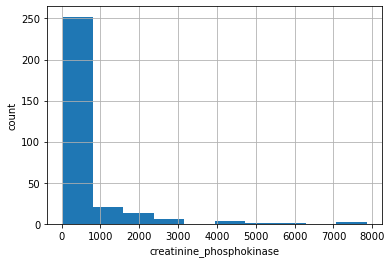

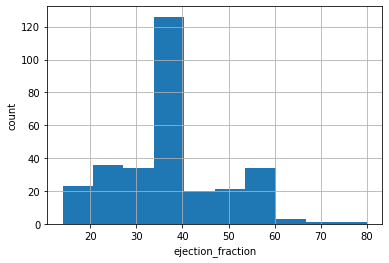

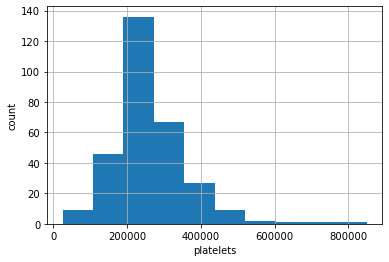

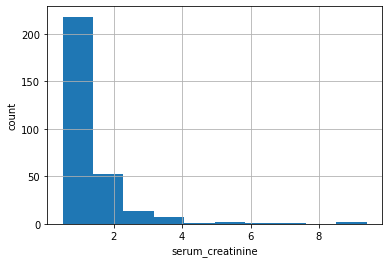

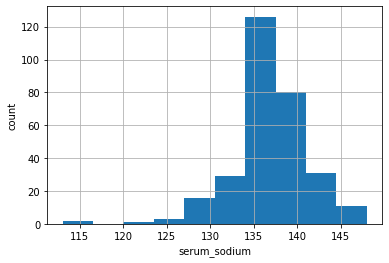

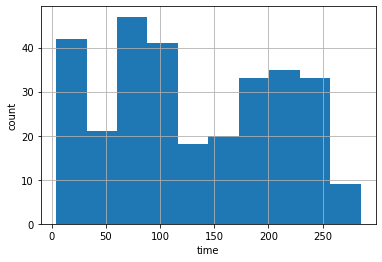

In [21]:
for feature in Numerical_feature:
    data=dataset.copy()
    data[feature].hist(bins=10)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.show()

# Correlation in Dataset

## Correlation between Quantitative variables

In [44]:
df=dataset[['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time','DEATH_EVENT']]

In [45]:
df1=dataset[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking','DEATH_EVENT']]

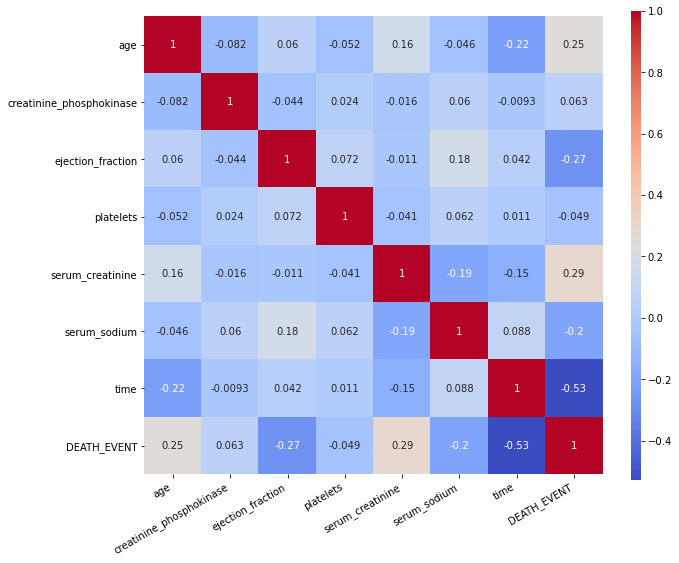

In [42]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data=df.astype({'DEATH_EVENT': 'int64'}).corr(),
            annot=True, cmap='coolwarm', cbar_kws={'aspect': 50},
            square=True, ax=ax)
plt.xticks(rotation=30, ha='right');
plt.tight_layout()

Inference: Only follow-up period is highly correlated to hearth failure relative to other features.

## Correlation between Qualitative/ Categorical variables

Cramer's V is more appropriate than Pearson correlation to find correlation between two nominal variables. Here, the Cramer's V metric is implemented.

In [50]:
def cramers_corrected_stat(contingency_table):
    """
        Computes corrected Cramer's V statistic for categorial-categorial association
    """
    
    try:
        chi2 = chi2_contingency(contingency_table)[0]
    except ValueError:
        return np.NaN
    
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    
    r, k = contingency_table.shape
    r_corrected = r - (((r-1)**2)/(n-1))
    k_corrected = k - (((k-1)**2)/(n-1))
    phi2_corrected = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    
    return (phi2_corrected / min( (k_corrected-1), (r_corrected-1)))**0.5

In [51]:
def categorical_corr_matrix(df1):
    """
        Computes corrected Cramer's V statistic between all the
        categorical variables in the dataframe
    """
    
    cols = df1.columns
    n = len(cols)
    corr_matrix = pd.DataFrame(np.zeros(shape=(n, n)), index=cols, columns=cols)
    
    excluded_cols = list()
    
    for col1 in cols:
        for col2 in cols:
            if col1 == col2:
                corr_matrix.loc[col1, col2] = 1
                break
            df1_crosstab = pd.crosstab(df1[col1], df1[col2], dropna=False)
            corr_matrix.loc[col1, col2] = cramers_corrected_stat(df1_crosstab)
                
    # Flip and add to get full correlation matrix
    corr_matrix += np.tril(corr_matrix, k=-1).T
    return corr_matrix

In [52]:
categorical_corr_matrix(df1)

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
anaemia,1.000000,0.000000,0.000000,0.065950,0.081721,0.011414
diabetes,0.000000,1.000000,0.000000,0.139276,0.127571,0.000000
high_blood_pressure,0.000000,0.000000,1.000000,0.078277,0.000000,0.042573
sex,0.065950,0.139276,0.078277,1.000000,0.435275,0.000000
smoking,0.081721,0.127571,0.000000,0.435275,1.000000,0.000000
DEATH_EVENT,0.011414,0.000000,0.042573,0.000000,0.000000,1.000000


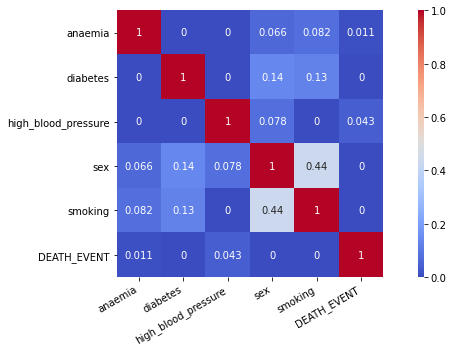

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(categorical_corr_matrix(df1), annot=True, cmap='coolwarm', 
            cbar_kws={'aspect': 50}, square=True, ax=ax)
plt.xticks(rotation=30, ha='right');
plt.tight_layout()

Inference: Only follow-up period is highly correlated to hearth failure relative to other features.
            patients having a long follow-up period have a lesser chance of death i.e they are negatively correlated.

# Finding outliers in time

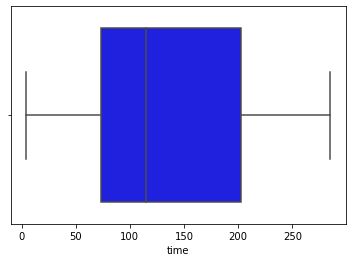

In [23]:
sns.boxplot(x=dataset.time, color = 'blue')
plt.show()

###  No outliers in time.

### Boxplot for ejection_fraction



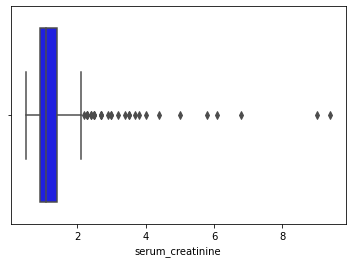

In [24]:
sns.boxplot(x=dataset.serum_creatinine, color = 'blue')
plt.show()

Before dealing with outliers we require knowledge about the outlier, the dataset and possibly some domain knowledge.
Removing outliers without a good reason will not always increase accuracy. Without a deep understanding of what are the possible ranges that
exist within each feature, removing outliers becomes tricky.

When I researched a bit I found that all the values in serum_creatinine falls in possible range of values. So they are not outliers. 
They are actual data points that helps in predicting DEATH_EVENT. 

# Train-Test split

In [12]:
x = dataset.iloc[:, :-1]
y = dataset['DEATH_EVENT']

categorical_columns = list(x.select_dtypes(include='category').columns)
numeric_columns = list(x.select_dtypes(exclude='category').columns)

In [13]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
data_splits = train_test_split(x, y, test_size=0.25, random_state=5,
                               shuffle=True, stratify=y)
x_train, x_test, y_train, y_test = data_splits


In [17]:
x_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
49,57.0,1,129,0,30,0,395000.0,1.0,140,0,0,42
280,70.0,0,2695,1,40,0,241000.0,1.0,137,1,0,247
194,45.0,0,582,0,20,1,126000.0,1.6,135,1,0,180
253,70.0,0,88,1,35,1,236000.0,1.2,132,0,0,215
125,43.0,1,358,0,50,0,237000.0,1.3,135,0,0,97
...,...,...,...,...,...,...,...,...,...,...,...,...
203,60.0,0,59,0,25,1,212000.0,3.5,136,1,1,187
93,60.0,1,154,0,25,0,210000.0,1.7,135,1,0,82
159,59.0,1,129,0,45,1,362000.0,1.1,139,1,1,121
12,45.0,1,981,0,30,0,136000.0,1.1,137,1,0,11


In [12]:
x_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
239,55.0,1,180,0,45,0,263358.03,1.18,137,1,1,211
65,60.0,0,68,0,20,0,119000.00,2.90,127,1,1,64
126,46.0,0,168,1,17,1,271000.00,2.10,124,0,0,100
260,55.0,0,66,0,40,0,203000.00,1.00,138,1,0,233
63,45.0,0,582,0,35,0,385000.00,1.00,145,1,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
108,63.0,0,936,0,38,0,304000.00,1.10,133,1,1,88
137,68.0,1,646,0,25,0,305000.00,2.10,130,1,0,108
236,75.0,0,119,0,50,1,248000.00,1.10,148,1,0,209
193,73.0,1,231,1,30,0,160000.00,1.18,142,1,1,180


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 

# Preprocessing Pipeline: Standardization
    
We need to standardize the continuous or quantitative variables/ features before applying Machine Learning models.

In [19]:

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])


## Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ],
    remainder='passthrough')


## Applying Column Transformer
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)


#### Applying logistic regression on the training set

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [21]:
# Predicting the test set

y_pred = classifier.predict(x_test)

In [22]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [23]:
# Making Confusion Matrix and calculating accuracy score

mylist=[]
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac=accuracy_score(y_test,y_pred)
mylist.append(ac)
print(cm)
print(ac)


[[45  6]
 [10 14]]
0.7866666666666666


In [24]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [25]:
  print(f1_score(y_test, y_pred, average="macro"))
   

0.7427101200686106


In [26]:
 print(precision_score(y_test, y_pred, average="macro"))
   

0.759090909090909


In [27]:
 print(recall_score(y_test, y_pred, average="macro"))  

0.732843137254902


In [28]:
Logistic_precision=0.759090909090909

#### Applying XGBoost classifier  on the training set


In [29]:
## Hyper Parameter Optimization/Tuning

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [30]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [31]:
classifier=xgboost.XGBClassifier()

In [32]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    7.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    7.5s finished
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [33]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [34]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
from xgboost import XGBClassifier
model = XGBClassifier()


In [42]:
model.fit(x_train,y_train)

[09:23:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
model.predict(x_test)

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [47]:
y_test_pred=model.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score,precision_score
print(accuracy_score(y_test,y_test_pred))
print(precision_score(y_test,y_test_pred))

0.8133333333333334
0.6785714285714286


In [57]:
# Optimized XGBOOST Classifier

model_1 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
model_1.fit(x_train,y_train)



[10:57:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
y_test_pred_1=model_1.predict(x_test)

In [61]:
print(accuracy_score(y_test,y_test_pred_1))
print(precision_score(y_test,y_test_pred_1))

0.8133333333333334
0.6923076923076923


#### we can see there is slightly 'precision score' has increased when we tuned its Hyperparameter